In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import plotly
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
resturant_data = pd.read_csv('/content/sample_data/resturant (1).csv')
resturant_data.head()

,cuisines/items/0/tag/localizedName,cuisines/items/1/tag/localizedName,cuisines/items/2/tag/localizedName,cuisines/items/3/tag/localizedName,cuisines/items/4/tag/localizedName,cuisines/items/5/tag/localizedName,cuisines/items/6/tag/localizedName,detailPageRoute/url,establishmentTypes/items/0/id,establishmentTypes/items/0/tag/localizedName,...,taLocation/contact/telephone,taLocation/hierarchy/parentGeoId,taLocation/names/parentGeo,thumbnail,thumbnail/photo/photoSizeDynamic/maxHeight,thumbnail/photo/photoSizeDynamic/maxWidth,thumbnail/photo/photoSizeDynamic/urlTemplate,travelerAwards,travelerAwards/awardType,travelerAwards/year
0,Bar,International,Dining bars,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d27740176-Reviews-G...,10591,Restaurants,...,+94 81 2 244333,304138,Kandy,NaN,1601.0,2400.0,https://dynamic-media-cdn.tripadvisor.com/medi...,NaN,NaN,NaN
1,Italian,Pizza,Beer restaurants,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d13551312-Reviews-V...,10591,Restaurants,...,+94 77 454 9000,304138,Kandy,NaN,2533.0,4500.0,https://dynamic-media-cdn.tripadvisor.com/medi...,NaN,COE,2024.0
2,International,Dining bars,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d13427841-Reviews-H...,10591,Restaurants,...,+94 81 2 227022,304138,Kandy,NaN,2048.0,2048.0,https://dynamic-media-cdn.tripadvisor.com/medi...,NaN,COE,2024.0
3,Sri Lankan,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d10458165-Reviews-S...,10591,Restaurants,...,+94 77 338 9665,304138,Kandy,NaN,900.0,1280.0,https://dynamic-media-cdn.tripadvisor.com/medi...,NaN,NaN,NaN
4,Asian,Sri Lankan,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d1134977-Reviews-Sh...,10591,Restaurants,...,+94 81 2 222416,304138,Kandy,NaN,3024.0,4032.0,https://dynamic-media-cdn.tripadvisor.com/medi...,NaN,COE,2024.0


Check the dimention of the dataset

In [ ]:
resturant_data.shape

(321, 62)

In [ ]:
len(resturant_data)

321

In [ ]:
resturant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 62 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   cuisines/items/0/tag/localizedName             292 non-null    object 
 1   cuisines/items/1/tag/localizedName             245 non-null    object 
 2   cuisines/items/2/tag/localizedName             194 non-null    object 
 3   cuisines/items/3/tag/localizedName             127 non-null    object 
 4   cuisines/items/4/tag/localizedName             91 non-null     object 
 5   cuisines/items/5/tag/localizedName             36 non-null     object 
 6   cuisines/items/6/tag/localizedName             7 non-null      object 
 7   detailPageRoute/url                            321 non-null    object 
 8   establishmentTypes/items/0/id                  321 non-null    int64  
 9   establishmentTypes/items/0/tag/localizedName   321 non

Remove unwanted columns


In [ ]:
resturant_data = resturant_data.drop(
    [  'establishmentTypes/items/0/id', 'establishmentTypes/items/0/tag/localizedName', 'establishmentTypes/items/1/id', 'establishmentTypes/items/1/tag/localizedName', 'establishmentTypes/items/2/id', 'establishmentTypes/items/2/tag/localizedName',
     'isAdsPreview', 'isSponsoredListing', 'location/distance','location/geoPoint','locationId','menu/hasProvider','menu/menuUrl','offers/hasDelivery','offers/hasReservation','offers/restaurantSpecialOffer','offers/slot1Offer','offers/slot2Offer',
       'openHours/openStatusText','priceTypes/items/0/secondaryName','reviewSnippetsV2/reviews/0/review/absoluteUrl','reviewSnippetsV2/reviews/0/review/status','reviewSnippetsV2/reviews/0/review/url','reviewSnippetsV2/reviews/0/seoContentType',
       'reviewSnippetsV2/reviews/1/review','reviewSnippetsV2/reviews/1/review/absoluteUrl','reviewSnippetsV2/reviews/1/review/status','reviewSnippetsV2/reviews/1/review/url',
       'reviewSnippetsV2/reviews/1/seoContentType','sponsoredListingData','storyboardStatus','taLocation/contact/streetAddress/country','taLocation/contact/streetAddress/postalCode',
       'taLocation/hierarchy/parentGeoId', 'taLocation/names/parentGeo', 'thumbnail', 'thumbnail/photo/photoSizeDynamic/maxHeight', 'thumbnail/photo/photoSizeDynamic/maxWidth', 'thumbnail/photo/photoSizeDynamic/urlTemplate',
       'travelerAwards'],axis=1)

Rename the columns

In [ ]:
resturant_data.columns = ['cuisine1', 'cuisine2', 'cuisine3', 'cuisine4', 'cuisine5', 'cuisine6', 'cuisine7', 'url', 'isLocalChef', 'isPremium', 'latitude', 'longitude', 'name', 'isOpen', 'Review1', 'Review2', 'reviewCount', 'rating', 'address', 'telephone', 'awardType', 'year']

In [ ]:
resturant_data['Review'] = resturant_data[['Review1', 'Review2']].fillna('').agg(' '.join, axis=1)

In [ ]:
resturant_data['year'] = resturant_data['year'].astype('Int64')

In [ ]:
resturant_data.head()

,cuisine1,cuisine2,cuisine3,cuisine4,cuisine5,cuisine6,cuisine7,url,isLocalChef,isPremium,...,isOpen,Review1,Review2,reviewCount,rating,address,telephone,awardType,year,Review
0,Bar,International,Dining bars,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d27740176-Reviews-G...,0,1,...,1,Great place for a ￹celebration￻,The Experience,157,4.8,"12 Mahamaya Mawatha, Kandy 20000 Sri Lanka",+94 81 2 244333,NaN,<NA>,Great place for a ￹celebration￻ The Experience
1,Italian,Pizza,Beer restaurants,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d13551312-Reviews-V...,0,0,...,1,I can recommend the very tasty hot ￹chili￻ sauce.,... pizza with really nice ￹garlic￻ sauce.,1000,4.8,"56, Saranankara Road, Kandy 20000 Sri Lanka",+94 77 454 9000,COE,2024,I can recommend the very tasty hot ￹chili￻ sau...
2,International,Dining bars,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d13427841-Reviews-H...,0,0,...,1,"Ps- I had a beer, tzatziki and pita and a ￹sal...",Probably the only place around kandy with...,793,4.6,"52 Sangaraja Mawatha, Kandy 20000 Sri Lanka",+94 81 2 227022,COE,2024,"Ps- I had a beer, tzatziki and pita and a ￹sal..."
3,Sri Lankan,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d10458165-Reviews-S...,0,0,...,1,We handled all the ingredients for vegetable a...,We were taught to cook seven dishes from...,89,5.0,"162/1 Panasara Mawatha,Halloluwa. Bus Junction...",+94 77 338 9665,NaN,<NA>,We handled all the ingredients for vegetable a...
4,Asian,Sri Lankan,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d1134977-Reviews-Sh...,0,0,...,1,We were welcomed with a soup and ￹roti￻.,Very good rice and curry buffet but very long ...,512,4.4,"59 Saranankara Rd Kandy Lake,, Kandy 20000 Sri...",+94 81 2 222416,COE,2024,We were welcomed with a soup and ￹roti￻. Very ...


Convert object value to numeric

In [ ]:
 resturant_data['isLocalChef'] = resturant_data['isLocalChef'].replace({True: 1, False: 0})
 resturant_data['isPremium'] = resturant_data['isPremium'].replace({True: 1, False: 0})

/tmp/ipython-input-32-3457826096.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-32-3457826096.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
resturant_data['isOpen'].unique()

array(['OPEN', 'CLOSED', nan, 'CLOSING', 'OPENING'], dtype=object)

In [ ]:
#Convert IsOpen column value to numeric. Original values are 'OPEN', 'CLOSED', 'CLOSING', nan
mapping = {'OPEN': 1, 'CLOSED': 0, 'CLOSING': 0,'OPENING': 1, np.nan: -1}
resturant_data['isOpen'] = resturant_data['isOpen'].map(mapping)
resturant_data['isOpen'] = resturant_data['isOpen'].astype(int)
resturant_data.head()


,cuisine1,cuisine2,cuisine3,cuisine4,cuisine5,cuisine6,cuisine7,url,isLocalChef,isPremium,...,name,isOpen,Review1,Review2,reviewCount,rating,address,telephone,awardType,year
0,Bar,International,Dining bars,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d27740176-Reviews-G...,0,1,...,Grand Sky Lounge,1,Great place for a ￹celebration￻,The Experience,157,4.8,"12 Mahamaya Mawatha, Kandy 20000 Sri Lanka",+94 81 2 244333,NaN,<NA>
1,Italian,Pizza,Beer restaurants,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d13551312-Reviews-V...,0,0,...,Vito Wood Fired Pizza,1,I can recommend the very tasty hot ￹chili￻ sauce.,... pizza with really nice ￹garlic￻ sauce.,1000,4.8,"56, Saranankara Road, Kandy 20000 Sri Lanka",+94 77 454 9000,COE,2024
2,International,Dining bars,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d13427841-Reviews-H...,0,0,...,Hideout Lounge,1,"Ps- I had a beer, tzatziki and pita and a ￹sal...",Probably the only place around kandy with...,793,4.6,"52 Sangaraja Mawatha, Kandy 20000 Sri Lanka",+94 81 2 227022,COE,2024
3,Sri Lankan,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d10458165-Reviews-S...,0,0,...,Sulochana's Kitchen,1,We handled all the ingredients for vegetable a...,We were taught to cook seven dishes from...,89,5.0,"162/1 Panasara Mawatha,Halloluwa. Bus Junction...",+94 77 338 9665,NaN,<NA>
4,Asian,Sri Lankan,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d1134977-Reviews-Sh...,0,0,...,Sharon Inn,1,We were welcomed with a soup and ￹roti￻.,Very good rice and curry buffet but very long ...,512,4.4,"59 Saranankara Rd Kandy Lake,, Kandy 20000 Sri...",+94 81 2 222416,COE,2024


Remove the rows has duplicated name

In [ ]:
resturant_data.drop_duplicates(subset=['name'], keep='first',inplace=True)

In [ ]:
resturant_data.shape

(316, 23)

In [ ]:
import re
import string

In [ ]:
resturant_data['Review'].head()

,Review
0,Great place for a ￹celebration￻ The Experience
1,I can recommend the very tasty hot ￹chili￻ sau...
2,"Ps- I had a beer, tzatziki and pita and a ￹sal..."
3,We handled all the ingredients for vegetable a...
4,We were welcomed with a soup and ￹roti￻. Very ...


In [ ]:
#Convert upper case to lower case
resturant_data['Review'] = resturant_data['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
#remove links
resturant_data['Review'] = resturant_data['Review'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#Remove Punctuations
def remove_punctuations(Review):
    for punctuation in string.punctuation:
        Review = Review.replace(punctuation, '')
    return Review

resturant_data['Review'] = resturant_data['Review'].apply(remove_punctuations)

In [ ]:
#Remove Numbers
resturant_data['Review'] = resturant_data['Review'].str.replace('\d+', '', regex=True)

In [ ]:
# Remove emojis
resturant_data['Review'] = resturant_data['Review'].str.replace('[^\x00-\x7F]+', '', regex=True)
resturant_data['Review'].head()

,Review
0,great place for a celebration the experience
1,i can recommend the very tasty hot chili sauce...
2,ps i had a beer tzatziki and pita and a salad ...
3,we handled all the ingredients for vegetable a...
4,we were welcomed with a soup and roti very goo...


In [ ]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
resturant_data['Review'] = resturant_data['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
resturant_data['Review'].head()

,Review
0,great place celebration experience
1,recommend tasty hot chili sauce pizza really n...
2,ps beer tzatziki pita salad canadian dollars p...
3,handled ingredients vegetable chicken curry as...
4,welcomed soup roti good rice curry buffet long...


In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
resturant_data['Review'] = resturant_data['Review'].apply(lambda x: " ".join([ps.stem(x) for word in x.split()]))

In [ ]:
from collections import Counter
vocab = Counter()

In [ ]:
vocab

Counter()

In [ ]:
for sentence in resturant_data['Review']:
  vocab.update(sentence.split())

len(vocab)

874

In [ ]:
tokens = [key for key in vocab if vocab[key] >= 10]

In [ ]:
tokens

['great',
 'place',
 'experi',
 'recommend',
 'tasty',
 'hot',
 'chili',
 'sauce',
 'pizza',
 'really',
 'nice',
 'garlic',
 'sauc',
 'ps',
 'beer',
 'tzatziki',
 'pita',
 'salad',
 'canadian',
 'dollars',
 'probably',
 'around',
 'kandi',
 'handled',
 'ingredients',
 'vegetable',
 'chicken',
 'curry',
 'assisted',
 'taught',
 'cook',
 'seven',
 'dish',
 'welcomed',
 'soup',
 'roti',
 'good',
 'rice',
 'buffet',
 'long',
 'servic',
 'menu',
 'limited',
 'cause',
 'owner',
 'products',
 'toast',
 'avocado',
 'king',
 'smoothie',
 'queen',
 'best',
 'ive',
 'ever',
 'theva',
 'residency',
 'offers',
 'stun',
 'food',
 'coffee',
 'clean',
 'kitchen',
 'plac',
 'eat',
 'drink',
 'enjoy',
 'real',
 'taste',
 'different',
 'foods',
 'kottu',
 'biryani',
 'excellent',
 'cheap',
 'dosai',
 'house',
 'near',
 'temple',
 'light',
 'quickli',
 'cant',
 'say',
 'outside',
 'definitely',
 'prawn',
 'altho',
 'value',
 'money',
 'mix',
 'indian',
 'chinese',
 'europ',
 'sitting',
 'lawn',
 'evening'

In [ ]:
x = resturant_data['Review']
y = resturant_data['rating']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,Review
208,excellent restaur excellent restaur
157,authentic thai food thai chef simple restauran...
94,kings rooftop restaurant delicious food thai g...
155,good luck team good luck team good luck team
75,good food terrible food scam good food terribl...
...,...
188,surprise italian find kandy sri lanka great pi...
71,best submarine got good restaur best submarine...
106,need go eat maybe get little something craft w...
271,


In [ ]:
x_test

,Review
173,
33,stayed hotel several times love colonial touch...
165,grate food nice atmospher grate food nice atmo...
78,feast curries side dishes set us back incredib...
93,good foood friendly staff food absolutely wond...
...,...
132,buffet king size eat king lot verities many cu...
254,good food toilets clean good food toilets clea...
175,best place stop way colombo kandy every time o...
226,citadel hotel anyway nice place service good c...


In [ ]:
y_train

,rating
208,3.7
157,3.8
94,3.7
155,5.0
75,3.8
...,...
188,4.7
71,4.9
106,4.9
271,-1.0


In [ ]:
y_test

,rating
173,-1.0
33,3.5
165,5.0
78,2.8
93,3.9
...,...
132,3.9
254,3.0
175,3.4
226,3.4


In [ ]:
#Vectorization
def vectorizer(ds, vocabulary):
  vectorized_lst = []

  for sentence in ds:
    sentence_lst = np.zeros(len(vocabulary))

    for i in range(len(vocabulary)):
      if vocabulary[i] in sentence.split():
        sentence_lst[i] += 1

    vectorized_lst.append(sentence_lst)

  vectorized_lst_new = np.asarray(vectorized_lst, dtype = np.float32)

  return vectorized_lst_new

In [ ]:
vectorized_x_train = vectorizer(x_train, tokens)

In [ ]:
vectorized_x_test = vectorizer(x_test, tokens)

In [ ]:
y_train.value_counts()

,count
rating,
-1.0,65
5.0,51
4.0,11
4.8,11
4.4,10
4.9,9
3.7,9
4.6,9
4.7,8


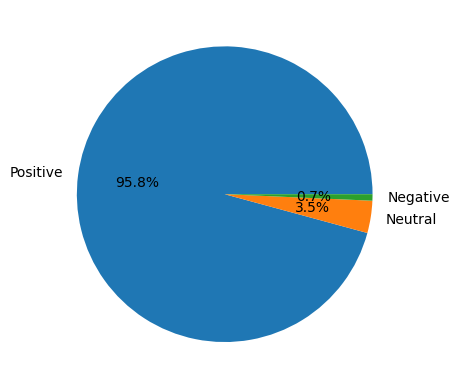

In [ ]:
# Exclude -1 ratings for this visualization
valid_ratings = y_train[y_train != -1]

# Categorize ratings
positive_count = valid_ratings[valid_ratings >= 4].shape[0]
neutral_count = valid_ratings[valid_ratings == 3].shape[0]
negative_count = valid_ratings[valid_ratings <= 2].shape[0]

counts = [positive_count, neutral_count, negative_count]
labels = ["Positive", "Neutral", "Negative"]

plt.pie(np.array(counts), labels=labels, autopct='%1.1f%%')
plt.show()

Handle Imbalanced Dataset

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np

# Calculate sample weights based on the inverse frequency of ratings
# We'll use the unique values in y_train as "classes" for weighting purposes
# Exclude -1 ratings for weight calculation
valid_y_train = y_train[y_train != -1]
valid_x_train = vectorized_x_train[y_train != -1]

if len(valid_y_train) > 0:
    sample_weights = compute_sample_weight(
        class_weight='balanced',
        y=valid_y_train
    )

    # Initialize and train a Linear Regression model with sample weights
    model = LinearRegression()
    model.fit(valid_x_train, valid_y_train, sample_weight=sample_weights)

    print("Model trained with sample weights.")
else:
    print("No valid ratings in y_train to train the model.")

# Note: You would then evaluate this model using appropriate regression metrics.

Model trained with sample weights.


In [ ]:
y_train.value_counts()

,count
rating,
-1.0,65
5.0,51
4.0,11
4.8,11
4.4,10
4.9,9
3.7,9
4.6,9
4.7,8


In [ ]:
# Categorize ratings into discrete classes
# Exclude -1 ratings before categorizing
y_train_categorized = y_train[y_train != -1].apply(lambda rating: 'Positive' if rating >= 4 else ('Neutral' if rating == 3 else 'Negative'))
y_test_categorized = y_test[y_test != -1].apply(lambda rating: 'Positive' if rating >= 4 else ('Neutral' if rating == 3 else 'Negative'))

# Align x_train and x_test with the filtered y_train_categorized and y_test_categorized
x_train_categorized = vectorized_x_train[y_train != -1]
x_test_categorized = vectorized_x_test[y_test != -1]

print("Training data shape after categorization:", x_train_categorized.shape, y_train_categorized.shape)
print("Testing data shape after categorization:", x_test_categorized.shape, y_test_categorized.shape)

Training data shape after categorization: (187, 837) (187,)
Testing data shape after categorization: (52, 837) (52,)


# Model Training and Evolution

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act,y_pred):
  acc = round(accuracy_score(y_act,y_pred),3)
  pr = round(precision_score(y_act,y_pred,average='weighted'),3)
  rec = round(recall_score(y_act,y_pred,average='weighted'),3)
  f1 = round(f1_score(y_act,y_pred,average='weighted'),3)
  print(f'Training Scores:\nAccuracy: {acc}\nPrecision: {pr}\nRecall: {rec}\nF1 Score: {f1}')

def validation_scores(y_act,y_pred):
  acc = round(accuracy_score(y_act,y_pred),3)
  pr = round(precision_score(y_act,y_pred,average='weighted'),3)
  rec = round(recall_score(y_act,y_pred,average='weighted'),3)
  f1 = round(f1_score(y_act,y_pred,average='weighted'),3)
  print(f'Testing Scores:\nAccuracy: {acc}\nPrecision: {pr}\nRecall: {rec}\nF1 Score: {f1}')

Logistic Regression

In [ ]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train_categorized, y_train_categorized)

y_train_pred = lr.predict(x_train_categorized)

training_scores(y_train_categorized,y_train_pred)

print()

y_test_pred = lr.predict(x_test_categorized)

validation_scores(y_test_categorized,y_test_pred)

Training Scores:
Accuracy: 0.984
Precision: 0.984
Recall: 0.984
F1 Score: 0.984

Testing Scores:
Accuracy: 0.654
Precision: 0.61
Recall: 0.654
F1 Score: 0.597


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Naive Bayes

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train_categorized, y_train_categorized)

y_train_pred = mnb.predict(x_train_categorized)

training_scores(y_train_categorized,y_train_pred)

print()

y_test_pred = mnb.predict(x_test_categorized)

validation_scores(y_test_categorized,y_test_pred)

Training Scores:
Accuracy: 0.936
Precision: 0.941
Recall: 0.936
F1 Score: 0.928

Testing Scores:
Accuracy: 0.615
Precision: 0.577
Recall: 0.615
F1 Score: 0.572


Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train_categorized, y_train_categorized)

y_train_pred = dt.predict(x_train_categorized)

training_scores(y_train_categorized,y_train_pred)

print()

y_test_pred = dt.predict(x_test_categorized)

validation_scores(y_test_categorized,y_test_pred)

Training Scores:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Testing Scores:
Accuracy: 0.673
Precision: 0.637
Recall: 0.673
F1 Score: 0.625


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train_categorized, y_train_categorized)

y_train_pred = rf.predict(x_train_categorized)

training_scores(y_train_categorized,y_train_pred)

print()

y_test_pred = rf.predict(x_test_categorized)

validation_scores(y_test_categorized,y_test_pred)

Training Scores:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Testing Scores:
Accuracy: 0.654
Precision: 0.632
Recall: 0.654
F1 Score: 0.561


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Support Vector Machine

In [ ]:
svm = SVC()
svm.fit(x_train_categorized, y_train_categorized)

y_train_pred = svm.predict(x_train_categorized)

training_scores(y_train_categorized,y_train_pred)

print()

y_test_pred = svm.predict(x_test_categorized)

validation_scores(y_test_categorized,y_test_pred)

Training Scores:
Accuracy: 0.925
Precision: 0.905
Recall: 0.925
F1 Score: 0.911

Testing Scores:
Accuracy: 0.635
Precision: 0.403
Recall: 0.635
F1 Score: 0.493


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Plot the Count of the rating

/tmp/ipython-input-16-1079484471.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




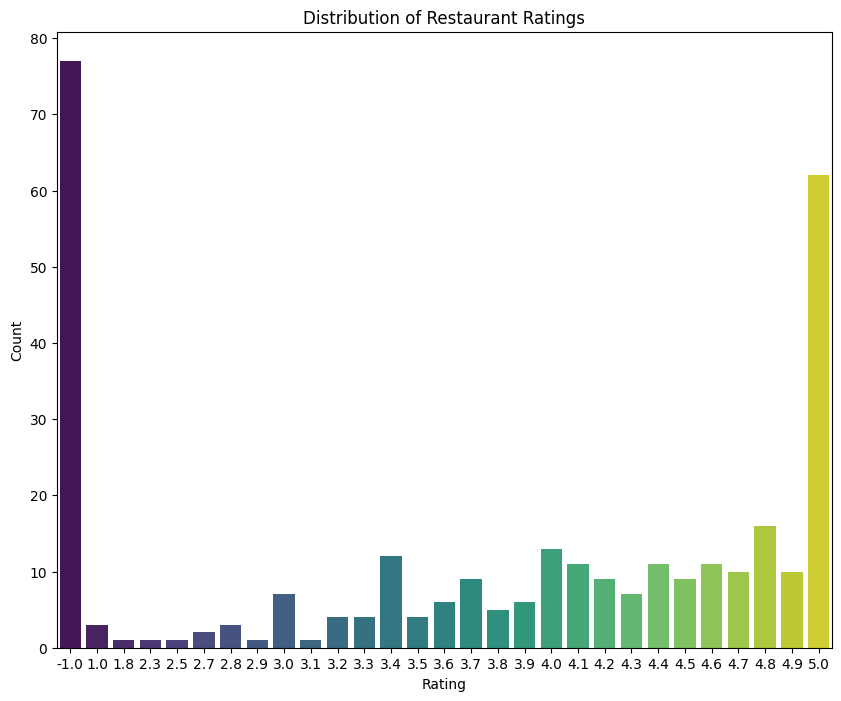

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='rating', data=resturant_data, palette='viridis')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Top 20 resturant by rating

In [ ]:
top_restaurants = resturant_data.sort_values(by = ['rating', 'reviewCount'], ascending = False)[:20]
top_restaurants.head()

,cuisine1,cuisine2,cuisine3,cuisine4,cuisine5,cuisine6,cuisine7,url,isLocalChef,isPremium,latitude,longitude,name,isOpen,reviewCount,rating,address,telephone,awardType,year
15,Italian,Pizza,Diner,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d32853220-Reviews-V...,0,1,7.284710,80.62444,Vito Wood Fired Pizza Peradeniya,1,91,5.0,"398 Peradeniya Rd, Kandy Hameedia - Peradeniya...",+94 77 992 1990,NaN,<NA>
3,Sri Lankan,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d10458165-Reviews-S...,0,0,7.290715,80.60727,Sulochana's Kitchen,1,89,5.0,"162/1 Panasara Mawatha,Halloluwa. Bus Junction...",+94 77 338 9665,NaN,<NA>
55,Chinese,Cafe,Seafood,Fast Food,Asian,Sri Lankan,NaN,/Restaurant_Review-g304138-d15838578-Reviews-K...,0,0,7.319561,80.64740,Kandyan Rice and Curry,1,31,5.0,"Pallegunnepana Road, Polgolla, Kandy, Kandy 20...",+94 76 837 6499,NaN,<NA>
47,Chinese,American,Asian,Sri Lankan,Arabic,NaN,NaN,/Restaurant_Review-g304138-d32835630-Reviews-H...,0,0,7.298508,80.63651,Hello Summer,1,29,5.0,"28a Hill Street, Kandy 20000 Sri Lanka",+94 71 930 9172,NaN,<NA>
38,Italian,Chinese,Cafe,Asian,Soups,NaN,NaN,/Restaurant_Review-g304138-d25448261-Reviews-T...,0,0,7.290642,80.63215,The Blizz Cafe,1,18,5.0,"3rd floor & rooftop, Lotus Building, No 242 D ...",+94 77 121 6261,NaN,<NA>


/tmp/ipython-input-20-4146986407.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




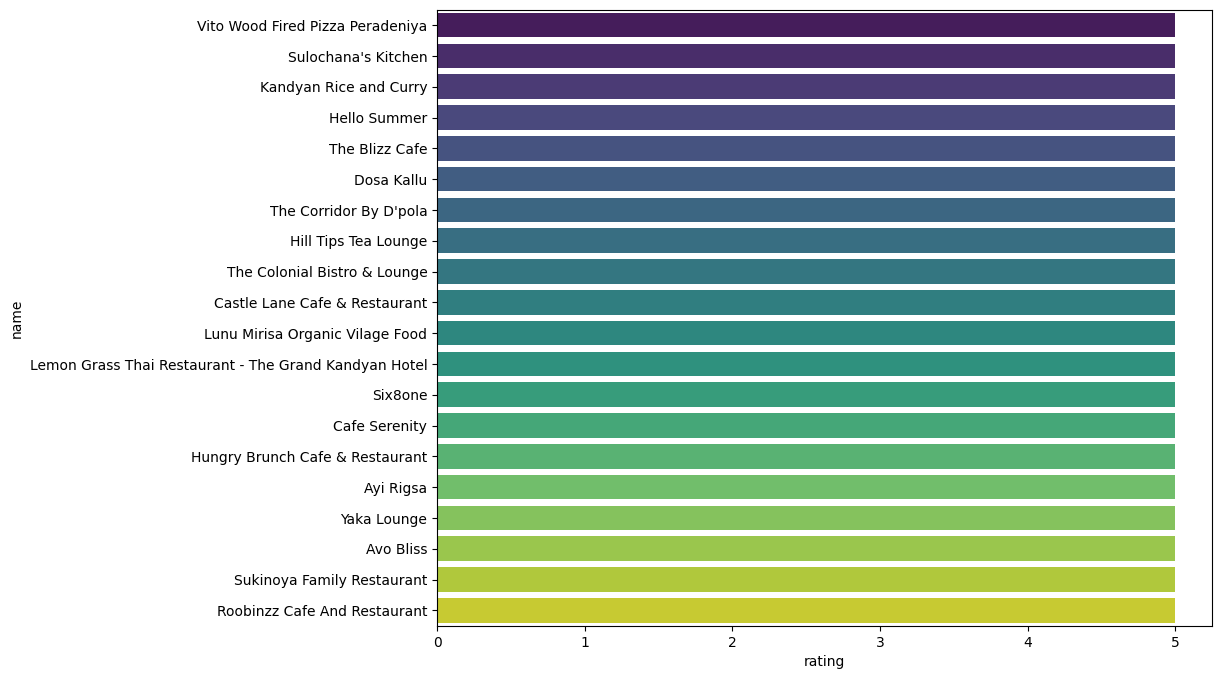

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x= 'rating', y = 'name', data= top_restaurants, ax = ax, palette = 'viridis')
plt.show()

Award


In [ ]:
filtered = resturant_data[resturant_data['awardType'] == 'COE']

# Select only the relevant columns
result = filtered[['name', 'awardType', 'year']]
result

,name,awardType,year
1,Vito Wood Fired Pizza,COE,2024
2,Hideout Lounge,COE,2024
4,Sharon Inn,COE,2024
5,Cafe Banana Chill,COE,2024
10,Sunset Kandy,COE,2024
11,The Empire Cafe,COE,2024
13,Slightly Chilled Lounge & Sunset Bar,COE,2024
14,Balaji Dosai,COE,2024
19,Soul Food,COE,2024


Check the number of premium restaurant

/tmp/ipython-input-27-4026000469.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




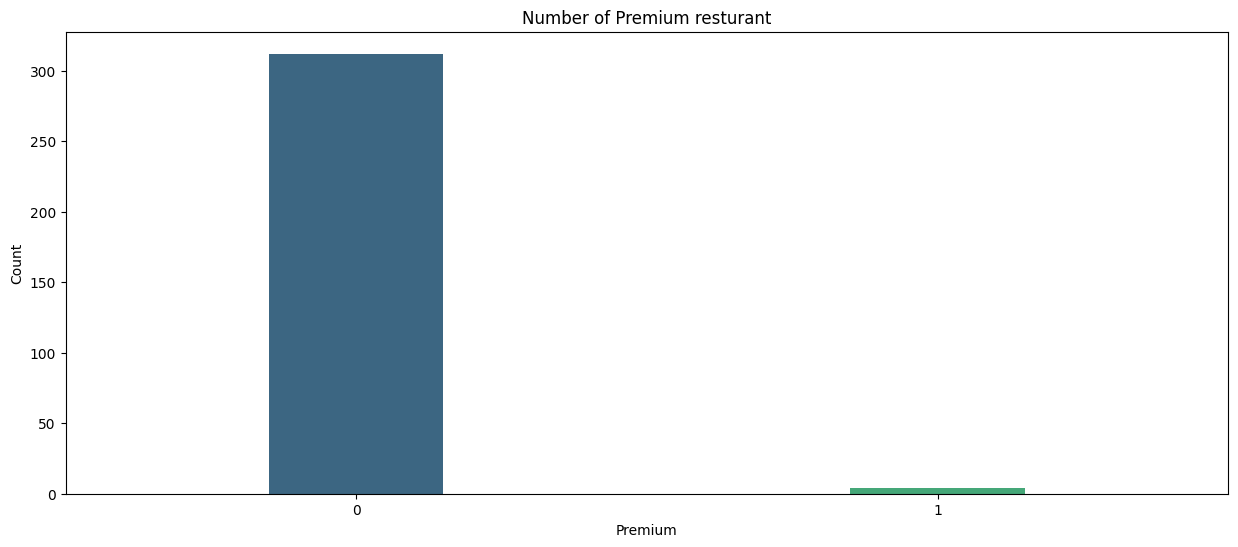

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='isPremium', data=resturant_data, palette='viridis', width=0.3)
plt.title('Number of Premium resturant')
plt.xlabel('Premium')
plt.ylabel('Count')
plt.show()

In [ ]:
resturant_data['isPremium'].value_counts()

,count
isPremium,
0,312
1,4


Create a new columns combined cuisines

In [ ]:
# List of cuisine columns that exist in the DataFrame
cuisine_cols = ['cuisine1']

# Combine non-empty cuisine values into a single column
resturant_data['combined_cuisines'] = resturant_data[cuisine_cols].apply(
    lambda row: ', '.join([str(val) for val in row if pd.notna(val) and str(val).strip() != '']),
    axis=1
)

In [ ]:
cuisine_data = resturant_data[resturant_data['combined_cuisines'].str.strip().astype(bool)]

# Drop rows where 'combined_cuisines' is an empty string after stripping whitespace
cuisine_data = cuisine_data[cuisine_data['combined_cuisines'] != '']

In [ ]:
cuisine_data['cuisine_count'] = cuisine_data['combined_cuisines'].apply(
    lambda x: len(x.split(', ')) if x else 0
)

Plot the number of cuisines

In [ ]:
cuisine_data['cuisine_count'].value_counts()

,count
cuisine_count,
1,287


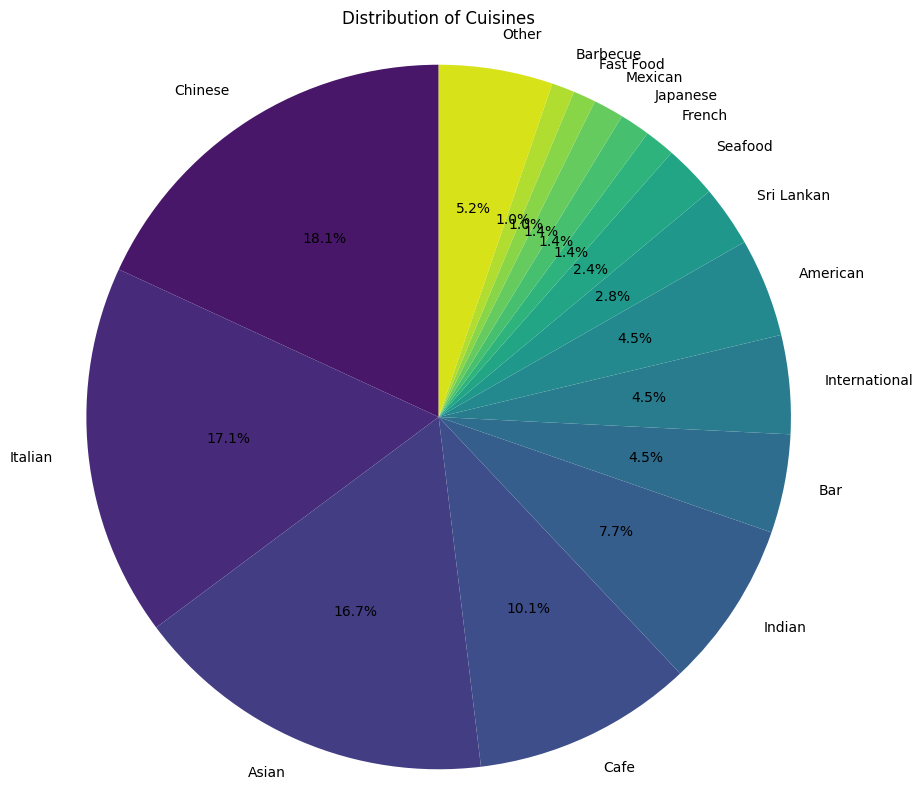

In [ ]:
# Split the 'combined_cuisines' string into individual cuisines
all_cuisines = cuisine_data['combined_cuisines'].str.split(', ').explode()

# Count the occurrences of each cuisine
cuisine_counts = all_cuisines.value_counts()

# Select the top N cuisines to display, and group the rest as 'Other'
top_n = 15
other_count = cuisine_counts[top_n:].sum()
top_cuisines = cuisine_counts[:top_n]

if other_count > 0:
    top_cuisines['Other'] = other_count

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(top_cuisines)))
plt.title('Distribution of Cuisines')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Top 10 resturant with higest review count

In [ ]:
top_10 = resturant_data[['name', 'reviewCount']].sort_values(by='reviewCount', ascending=False).head(10)
top_10

,name,reviewCount
13,Slightly Chilled Lounge & Sunset Bar,2224
14,Balaji Dosai,1351
1,Vito Wood Fired Pizza,1000
20,Licensed To Grill By Di's,998
17,Senani BY Oak ray Restaurant & Bar,960
21,Kandyan Muslim Hotel,952
37,The Pub,892
107,Green View Restaurant,891
2,Hideout Lounge,793
45,Natural Coffee,704


/tmp/ipython-input-38-1024763577.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




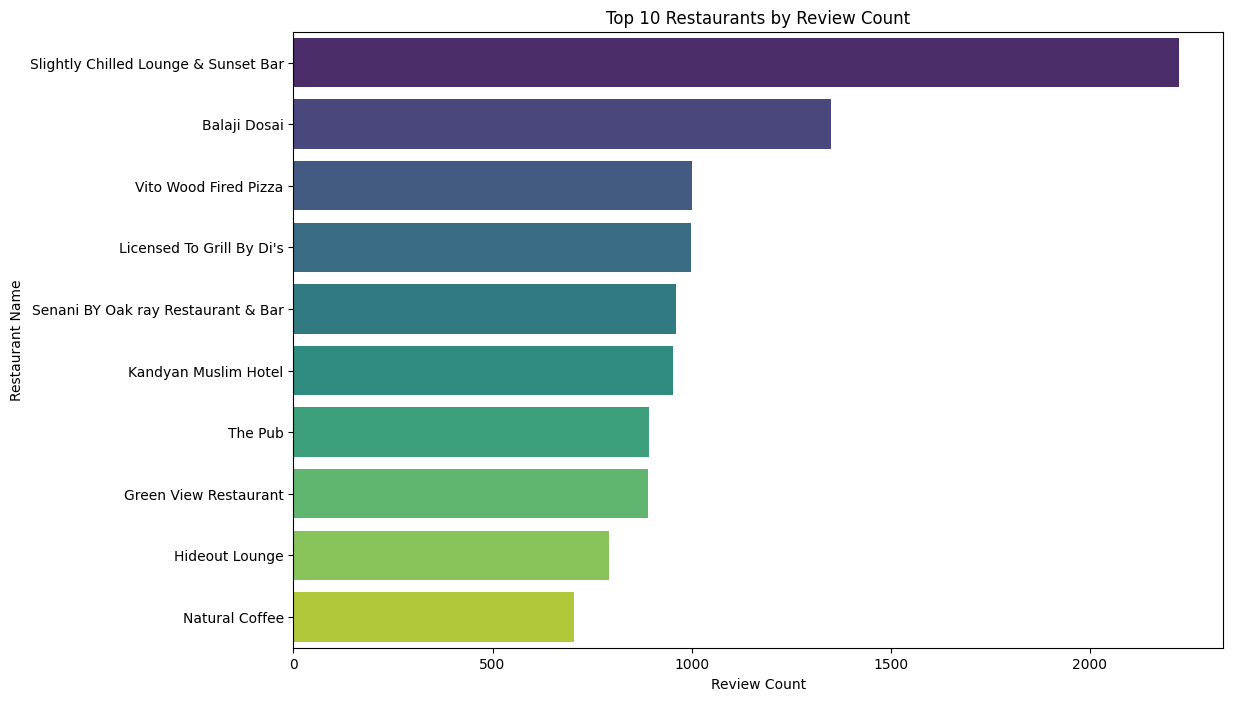

In [ ]:

plt.figure(figsize=(12, 8))
sns.barplot(x='reviewCount', y='name', data=top_10, palette='viridis')
plt.title('Top 10 Restaurants by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Restaurant Name')
plt.show()


In [ ]:
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree

!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install folium
!pip install plotly_express

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6 python3-rtree
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 365 kB of archives.
After this operation, 1,799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Filter data within Kandy town bounding box
kandy_town_data = resturant_data[
    (resturant_data['latitude'] >= 7.2750) & (resturant_data['latitude'] <= 7.3100) &
    (resturant_data['longitude'] >= 80.6100) & (resturant_data['longitude'] <= 80.6600)
]

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    kandy_town_data,
    lat="latitude",
    lon="longitude",
    color="rating",
    size="reviewCount",
    size_max=30,
    zoom=15,
    center={"lat": 7.2906, "lon": 80.6337},
    mapbox_style='carto-positron',
    hover_name="name",  # Show restaurant name on hover
    width=1000,
    height=800
)
fig.show()

# Determine the number of clusters(K)

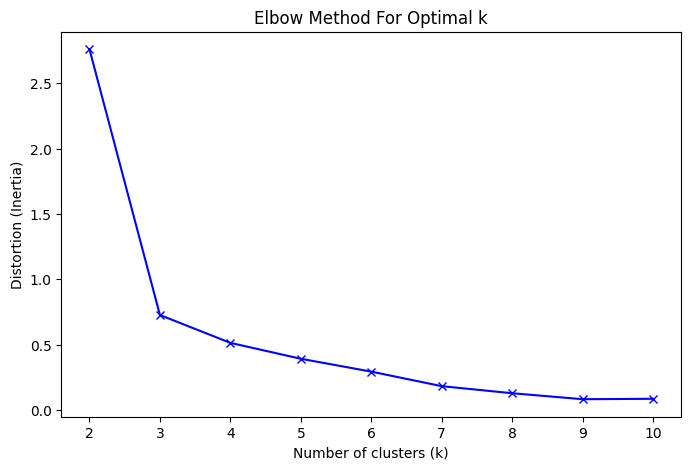

In [ ]:
coords = resturant_data[['latitude', 'longitude']].dropna()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Drop NaNs from coordinate columns
coords = resturant_data[['latitude', 'longitude']].dropna()

distortions = []  # initialize before loop
K = range(2, 11)

for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()


Silhoute Method

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 50

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(coords)
    labels = kmeans.labels_
    sil_avg = silhouette_score(coords, labels)
    sil.append(sil_avg)
    kmeans.fit(coords)

In [ ]:
sil

[np.float64(0.9964061729174681),
 np.float64(0.9430487923413535),
 np.float64(0.9075691829945631),
 np.float64(0.907776263103662),
 np.float64(0.9036752173402857),
 np.float64(0.714333134794173),
 np.float64(0.7114023487016536),
 np.float64(0.22402403706803034),
 np.float64(0.5731782261305777),
 np.float64(0.5391624030769565),
 np.float64(0.44199959784498855),
 np.float64(0.46590483685900635),
 np.float64(0.3898096485659754),
 np.float64(0.5132606086213355),
 np.float64(0.5210397269553576),
 np.float64(0.5014558920650778),
 np.float64(0.48755141940075325),
 np.float64(0.530771480715998),
 np.float64(0.5040721248010689),
 np.float64(0.4899354040509119),
 np.float64(0.5109694596430109),
 np.float64(0.4087347316230121),
 np.float64(0.5063066287158436),
 np.float64(0.4764716754565742),
 np.float64(0.4796425952407568),
 np.float64(0.5045308603762261),
 np.float64(0.4401124783494999),
 np.float64(0.44431125219246065),
 np.float64(0.47930489053624753),
 np.float64(0.5040916715310445),
 np.flo

# K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print('k=5', 'Silhouette Score:', silhouette_score(coords, y, metric='euclidean'))

k=5 Silhouette Score: 0.907776263103662


In [ ]:
# 1. Prepare the data for prediction - drop NaNs
coords_no_nan = resturant_data[['latitude', 'longitude']].dropna()

# 2. Predict clusters on clean data
clusters = kmeans.predict(coords_no_nan)

# 3. Assign clusters back only to the rows without NaNs
resturant_data.loc[coords_no_nan.index, 'cluster'] = clusters

# 4. Check result
resturant_data.head()


,cuisine1,cuisine2,cuisine3,cuisine4,cuisine5,cuisine6,cuisine7,url,isLocalChef,isPremium,latitude,longitude,name,isOpen,reviewCount,rating,address,telephone,awardType,year,combined_cuisines,cluster
0,Bar,International,Dining bars,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d27740176-Reviews-Grand_Sky_Lounge-Kandy_Kandy_District_Central_Province.html,0,1,7.285383,80.64447,Grand Sky Lounge,1,157,4.8,"12 Mahamaya Mawatha, Kandy 20000 Sri Lanka",+94 81 2 244333,NaN,<NA>,Bar,3.0
1,Italian,Pizza,Beer restaurants,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d13551312-Reviews-Vito_Wood_Fired_Pizza-Kandy_Kandy_District_Central_Province.html,0,0,7.287843,80.64234,Vito Wood Fired Pizza,1,1000,4.8,"56, Saranankara Road, Kandy 20000 Sri Lanka",+94 77 454 9000,COE,2024,Italian,42.0
2,International,Dining bars,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d13427841-Reviews-Hideout_Lounge-Kandy_Kandy_District_Central_Province.html,0,0,7.287413,80.64656,Hideout Lounge,1,793,4.6,"52 Sangaraja Mawatha, Kandy 20000 Sri Lanka",+94 81 2 227022,COE,2024,International,3.0
3,Sri Lankan,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d10458165-Reviews-Sulochana_s_Kitchen-Kandy_Kandy_District_Central_Province.html,0,0,7.290715,80.60727,Sulochana's Kitchen,1,89,5.0,"162/1 Panasara Mawatha,Halloluwa. Bus Junction Halloluwa,kandy, Kandy 20023 Sri Lanka",+94 77 338 9665,NaN,<NA>,Sri Lankan,46.0
4,Asian,Sri Lankan,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d1134977-Reviews-Sharon_Inn-Kandy_Kandy_District_Central_Province.html,0,0,7.287215,80.64206,Sharon Inn,1,512,4.4,"59 Saranankara Rd Kandy Lake,, Kandy 20000 Sri Lanka",+94 81 2 222416,COE,2024,Asian,42.0


In [ ]:
px.scatter_mapbox(
    resturant_data,
    lat="latitude",
    lon="longitude",
    color="cluster",
    zoom=14,
    center={"lat": 7.2906, "lon": 80.6337},
    mapbox_style='carto-positron',
    width=1000,
    height=800
)



# Location Based Recommendation

In [ ]:
top_restaurants_Kandy = resturant_data.sort_values(by = ['rating', 'reviewCount'], ascending = False)
top_restaurants_Kandy.head()

,cuisine1,cuisine2,cuisine3,cuisine4,cuisine5,cuisine6,cuisine7,url,isLocalChef,isPremium,latitude,longitude,name,isOpen,reviewCount,rating,address,telephone,awardType,year,combined_cuisines,cluster
15,Italian,Pizza,Diner,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d32853220-Reviews-Vito_Wood_Fired_Pizza_Peradeniya-Kandy_Kandy_District_Central_Province.html,0,1,7.284710,80.62444,Vito Wood Fired Pizza Peradeniya,1,91,5.0,"398 Peradeniya Rd, Kandy Hameedia - Peradeniya, Kandy 20000 Sri Lanka",+94 77 992 1990,NaN,<NA>,Italian,32.0
3,Sri Lankan,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g304138-d10458165-Reviews-Sulochana_s_Kitchen-Kandy_Kandy_District_Central_Province.html,0,0,7.290715,80.60727,Sulochana's Kitchen,1,89,5.0,"162/1 Panasara Mawatha,Halloluwa. Bus Junction Halloluwa,kandy, Kandy 20023 Sri Lanka",+94 77 338 9665,NaN,<NA>,Sri Lankan,46.0
55,Chinese,Cafe,Seafood,Fast Food,Asian,Sri Lankan,NaN,/Restaurant_Review-g304138-d15838578-Reviews-Kandyan_Rice_and_Curry-Kandy_Kandy_District_Central_Province.html,0,0,7.319561,80.64740,Kandyan Rice and Curry,1,31,5.0,"Pallegunnepana Road, Polgolla, Kandy, Kandy 20000 Sri Lanka",+94 76 837 6499,NaN,<NA>,Chinese,44.0
47,Chinese,American,Asian,Sri Lankan,Arabic,NaN,NaN,/Restaurant_Review-g304138-d32835630-Reviews-Hello_Summer-Kandy_Kandy_District_Central_Province.html,0,0,7.298508,80.63651,Hello Summer,1,29,5.0,"28a Hill Street, Kandy 20000 Sri Lanka",+94 71 930 9172,NaN,<NA>,Chinese,38.0
38,Italian,Chinese,Cafe,Asian,Soups,NaN,NaN,/Restaurant_Review-g304138-d25448261-Reviews-The_Blizz_Cafe-Kandy_Kandy_District_Central_Province.html,0,0,7.290642,80.63215,The Blizz Cafe,1,18,5.0,"3rd floor & rooftop, Lotus Building, No 242 D S Senanayaka Street, Kandy 20000 Sri Lanka",+94 77 121 6261,NaN,<NA>,Italian,33.0


Get top 5 recommended restaurents in kandy

In [ ]:
import numpy as np

def recommend_restaurants(resturant_data, longitude=80.6337, latitude=7.2906, top_n=5):
    # Predict cluster for the given coordinates
    cluster = kmeans.predict(np.array([longitude, latitude]).reshape(1, -1))[0]
    print(f"Predicted cluster: {cluster}")

    # Restaurants in predicted cluster
    cluster_restaurants = resturant_data[resturant_data['cluster'] == cluster]
    cluster_restaurants = cluster_restaurants.sort_values(by='rating', ascending=False)

    # If less than top_n, add more from the full dataset (excluding duplicates)
    if len(cluster_restaurants) < top_n:
        needed = top_n - len(cluster_restaurants)
        fallback = resturant_data[~resturant_data.index.isin(cluster_restaurants.index)]
        fallback = fallback.sort_values(by='rating', ascending=False).head(needed)
        recommendations = pd.concat([cluster_restaurants, fallback]) # Changed from append to concat
    else:
        recommendations = cluster_restaurants.head(top_n)

    return recommendations[['name', 'latitude', 'longitude']]

# Example usage
recommend_restaurants(top_restaurants_Kandy)


Predicted cluster: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude
291,Top royal cafe & restaurant,43.060000,-82.527000
172,Downtown Cafe,7.292740,80.630410
174,Savoury Cake,7.287806,80.624535
74,Lobster Arena,7.293427,80.648480
138,Hotel Saumiya,7.293798,80.638260


Get top 10 recommended restaurents in kandy

In [ ]:
import numpy as np
import pandas as pd

def recommend_restaurants(resturant_data, longitude=80.6337, latitude=7.2906, top_n=10):
    # Predict cluster for the given coordinates (Kandy center by default)
    cluster = kmeans.predict(np.array([longitude, latitude]).reshape(1, -1))[0]
    print(f"Predicted cluster: {cluster}")

    # Restaurants in predicted cluster
    cluster_restaurants = resturant_data[resturant_data['cluster'] == cluster]
    cluster_restaurants = cluster_restaurants.sort_values(by='rating', ascending=False)

    # If fewer than top_n, add top-rated restaurants from other clusters
    if len(cluster_restaurants) < top_n:
        needed = top_n - len(cluster_restaurants)
        fallback = resturant_data[~resturant_data.index.isin(cluster_restaurants.index)]
        fallback = fallback.sort_values(by='rating', ascending=False).head(needed)
        recommendations = pd.concat([cluster_restaurants, fallback])
    else:
        recommendations = cluster_restaurants.head(top_n)

    return recommendations[['name', 'latitude', 'longitude']]

# Example usage
recommend_restaurants(top_restaurants_Kandy)


Predicted cluster: 1


,name,latitude,longitude
291,Top royal cafe & restaurant,43.060000,-82.527000
172,Downtown Cafe,7.292740,80.630410
174,Savoury Cake,7.287806,80.624535
74,Lobster Arena,7.293427,80.648480
138,Hotel Saumiya,7.293798,80.638260
141,Cafe 210,NaN,NaN
255,Red Spice,7.298060,80.650670
128,The Black Bean Café,7.284261,80.619970
150,The Loft - Kandy,7.299697,80.636990
158,Cafe Kandyana,7.288782,80.644750


# **Application**

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import folium
from IPython.display import HTML


resturant_review_data = pd.read_csv('/content/sample_data/Rest_review - Sheet1 (1).csv')
resturant_review_data.head()

# First, create a new merged review column if you haven't already
resturant_review_data['combined_review'] = resturant_review_data[['review1', 'review2']].fillna('').agg(' '.join, axis=1)

# Dropdown
dropdown = widgets.Dropdown(
    options=resturant_review_data['name'].dropna().unique(),
    description='Restaurant:',
    layout=widgets.Layout(width='50%')
)

output = widgets.Output()

def show_reviews(change):
    with output:
        clear_output(wait=True)

        selected = change['new']
        info = resturant_review_data[resturant_review_data['name'] == selected]
        display(info[['name', 'rating', 'latitude', 'longitude', 'combined_review']])

        # Get lat/lon
        lat = info['latitude'].values[0]
        lon = info['longitude'].values[0]

         # Add vertical space
        display(HTML("<div style='margin-top: 50px;'></div>"))  # 20px vertical space

        # Create and display map
        m = folium.Map(location=[lat, lon], zoom_start=16)
        folium.Marker([lat, lon], popup=selected).add_to(m)
        display(m)

dropdown.observe(show_reviews, names='value')

display(dropdown, output)


Dropdown(description='Restaurant:', layout=Layout(width='50%'), options=('Grand Sky Lounge', 'Vito Wood Fired …

Output()